**Exercise 6.2** Many named patterns are available in portable file formats. Modify `Life.py` to parse on of these formats and initialize the grid.

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.signal import correlate2d
from Cell2D import Cell2D

class Life(Cell2D):
    
    kernel = np.array([[1, 1, 1],
                       [1, 10, 1],
                       [1, 1, 1]])
    table = np.zeros(20, dtype = np.uint8)
    table[[3, 12, 13]] = 1
    
    def step(self):
        c = correlate2d(self.array, self.kernel, mode='same')
        self.array = self.table[c]


C:\Users\Carlo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
def read_GoL_file(life, filename, row, col):
    i = row
    life_file = open(filename)
    for i, line in enumerate(life_file):
        if line.startswith("!"):
            continue
        line = line.strip() #removes whitespace
        line = line.replace('O', '1')
        line = line.replace('.', '0')
        life.add_cells(i, col, line)

From large number of patterns available, I chose the "A for All" pattern which is period 6 oscillator. I have downloaded the plaintext version.

In [22]:
n = 30
m = 30
row = 10
col = 10

life = Life(n, m)
filename = 'aforall.cells.txt'
read_GoL_file(life, filename, row, col)

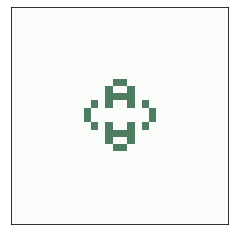

In [13]:
life.draw()

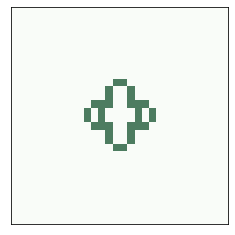

In [14]:
life.animate(60, 0.5)